In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # 如果 notebook 在 your_project/notebooks 里


from data.market_data import OKXDataFetcher
from score_system.scanner import Scanner
from utils.plots import plot_kline_chart
from signals.buy_signal import BuySignal
from signals.sell_signal import SellSignal
import warnings

warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [3]:
okx_data_fetcher = OKXDataFetcher()
scanner = Scanner()

In [4]:
scanner.scan_strong_symbols(volume_threshold=1.0, kline_limit=30, max_symbols=50)

,symbol,score,1h_return(%),volume_change(%),EMA_structure
21,MASK-USDT-SWAP,44.88,3.20,-83.19,bullish
27,BNB-USDT-SWAP,22.96,0.00,-70.38,bearish
37,JTO-USDT-SWAP,22.25,1.83,-95.83,bearish
36,LDO-USDT-SWAP,22.12,0.69,-85.67,bearish
1,BTC-USDT-SWAP,21.56,-0.71,-77.29,bearish
25,LTC-USDT-SWAP,20.95,-0.19,-88.66,bearish
8,AAVE-USDT-SWAP,20.70,-0.08,-92.22,bearish
41,FIL-USDT-SWAP,20.39,-0.89,-87.20,bearish
3,DOGE-USDT-SWAP,20.37,-0.46,-91.71,bearish
33,COMP-USDT-SWAP,20.32,-0.83,-88.49,bearish


In [5]:
df = okx_data_fetcher.get_kline('MASK-USDT-SWAP',bar='1H')

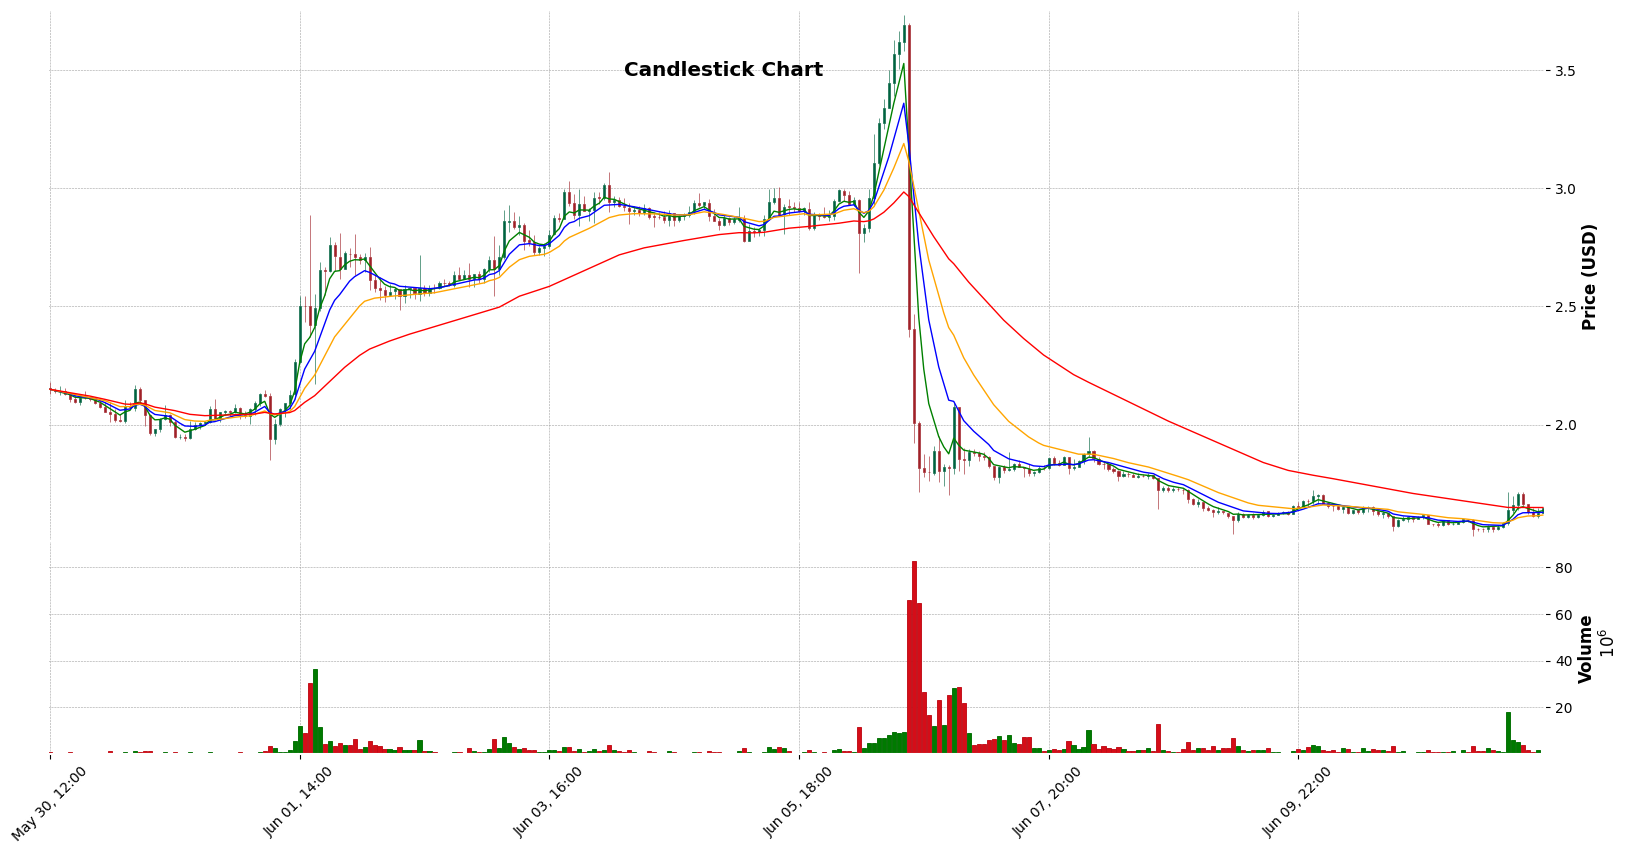

In [6]:
plot_kline_chart(df)

In [7]:
bs = BuySignal()
ss = SellSignal()

df_signal = bs.detect_dizijue_entry(df)
df_signal = ss.detect_exit_signal_full(df_signal)

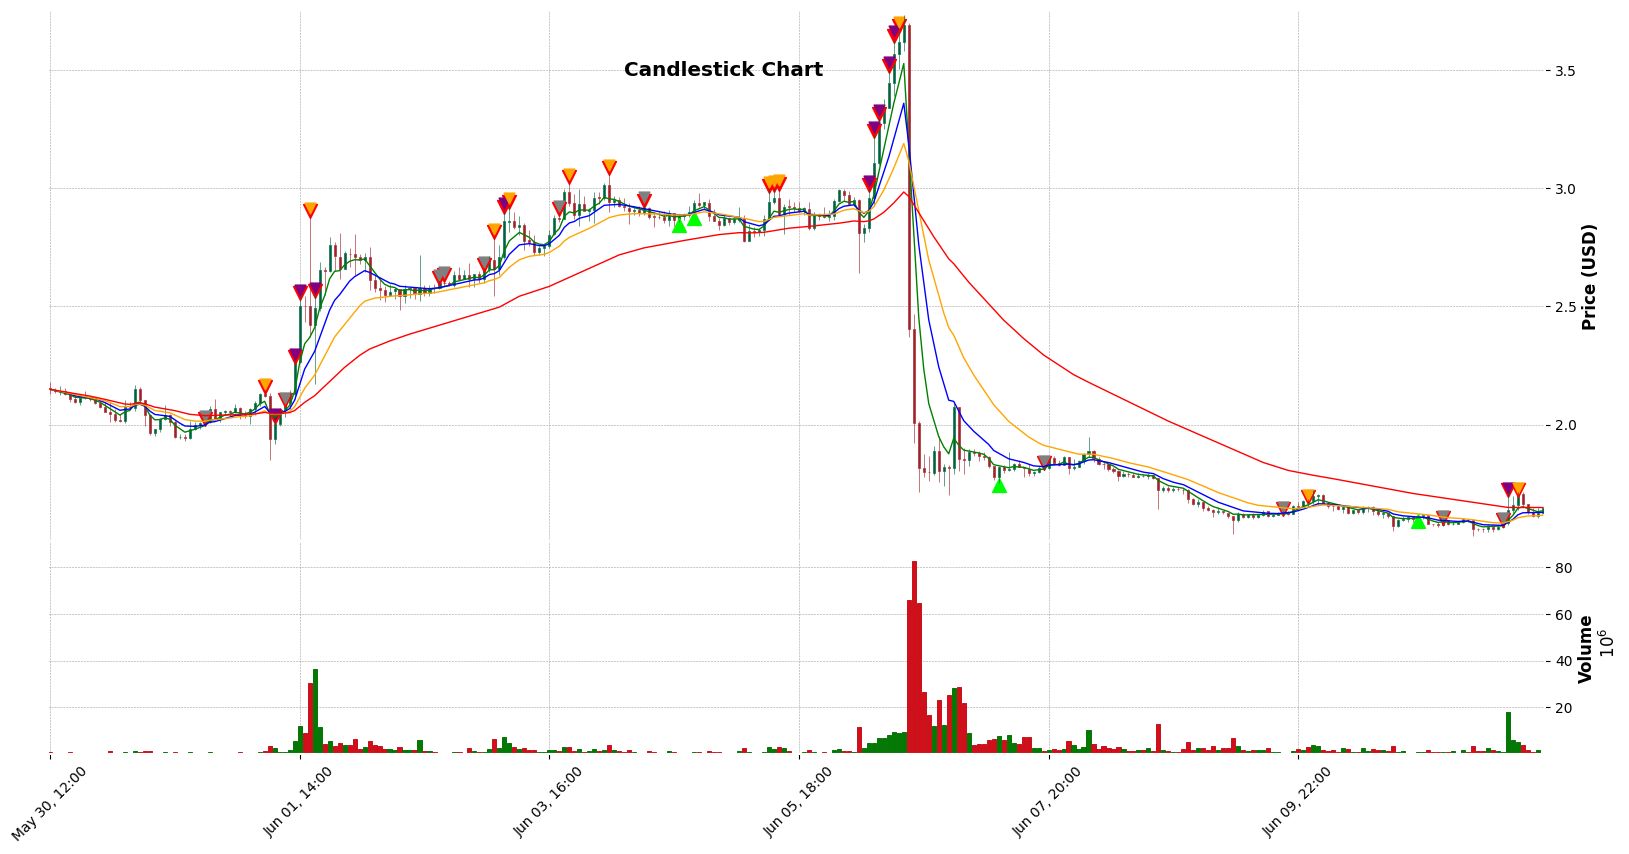

In [8]:
plot_kline_chart(df_signal)